In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


2026-01-03 18:29:18.309987: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/niku/github/Neural_Netowrk/.venv/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
# 2次元・2クラスの人工データ生成
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=1 # この値を変えて複数パターン作成する
)

In [3]:
# モデルの定義と学習（画像ではロジスティック回帰）
model = LogisticRegression(penalty=None, solver="lbfgs")
model.fit(X, y)

# 描画用グリッドの設定
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

/home/niku/github/Neural_Netowrk/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


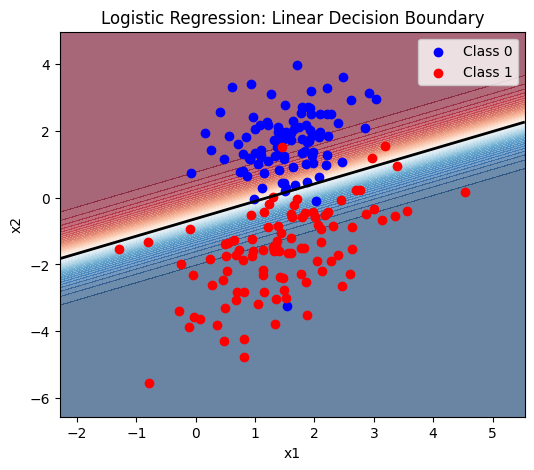

In [4]:
# 予測と整形
grid = np.c_[xx.ravel(), yy.ravel()]
prob = model.predict_proba(grid)[:, 1]
prob = prob.reshape(xx.shape)

plt.figure(figsize=(6, 5))

# 背景（確率）の塗りつぶし
plt.contourf(xx, yy, prob, levels=50, cmap="RdBu", alpha=0.6)

# 分離境界（確率0.5の線）
plt.contour(xx, yy, prob, levels=[0.5], colors="black", linewidths=2)

# データ点のプロット
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="blue", label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="red", label="Class 1")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Logistic Regression: Linear Decision Boundary")
plt.show()